## Data Cleaning

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

In [172]:
df = pd.read_csv('data/raw_data.csv')

In [173]:
df.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,Month,Year
0,1,20.8,27.0,15.3,-,56,0,6.3,4.8,11.1,-,NaN,NaN,NaN,NaN,1.0,2008.0
1,2,20.1,27.6,14.0,-,55,0,6.3,5.2,9.4,-,NaN,NaN,NaN,NaN,1.0,2008.0
2,3,20.3,28.3,13.8,-,55,0,6.3,5.0,7.6,-,NaN,NaN,NaN,NaN,1.0,2008.0
3,4,21.3,26.3,16.0,-,78,0,5.8,6.3,11.1,-,o,NaN,NaN,NaN,1.0,2008.0
4,5,20.4,26.6,16.8,-,65,0,5.5,5.0,7.6,-,o,NaN,NaN,NaN,1.0,2008.0


In [180]:
df["train"] = df["Year"].apply(lambda x: 1 if x < 2023 else 0)

In [181]:
df["train"].value_counts()

train
1    5479
0     335
Name: count, dtype: int64

In [182]:
df.shape

(5814, 18)

In [183]:
df.describe()

,Day,Month,Year,train
count,5814.000000,5814.000000,5814.000000,5814.000000
mean,15.730822,6.525628,2015.460268,0.942380
std,8.801574,3.457682,4.590440,0.233043
min,1.000000,1.000000,2008.000000,0.000000
25%,8.000000,4.000000,2011.000000,1.000000
50%,16.000000,7.000000,2015.000000,1.000000
75%,23.000000,10.000000,2019.000000,1.000000
max,31.000000,12.000000,2023.000000,1.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     5814 non-null   int64  
 1   T       5814 non-null   object 
 2   TM      5814 non-null   object 
 3   Tm      5814 non-null   object 
 4   SLP     5814 non-null   object 
 5   H       5814 non-null   object 
 6   PP      5814 non-null   object 
 7   VV      5814 non-null   object 
 8   V       5814 non-null   object 
 9   VM      5814 non-null   object 
 10  VG      5814 non-null   object 
 11  RA      2051 non-null   object 
 12  SN      35 non-null     object 
 13  TS      522 non-null    object 
 14  FG      48 non-null     object 
 15  Month   5814 non-null   float64
 16  Year    5814 non-null   float64
 17  train   5814 non-null   int64  
dtypes: float64(2), int64(2), object(14)
memory usage: 817.7+ KB


In [185]:
df.columns

Index(['Day', 'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'RA',
       'SN', 'TS', 'FG', 'Month', 'Year', 'train'],
      dtype='object')

- here 'o' is Overcast

- dash ("-") typically indicates that data is missing or not applicable for that particular entry

- A blank space (" ") may also signify that no data is available or that the measurement was not taken

**"Overcast"** refers to a sky condition where clouds cover the entire sky, blocking out sunlight. When it's overcast, the weather can feel dull and gray, and there is typically little to no visible blue sky. Overcast conditions can lead to cooler temperatures and may bring rain or snow, depending on the overall weather system in place. It often indicates a higher likelihood of precipitation compared to partly cloudy or clear skies.

In [186]:
df.replace({'-': np.nan, ' ': np.nan, 'o': 1}, inplace=True)

In [187]:
df.isna().sum()

Day         0
T          32
TM         32
Tm         32
SLP      5814
H          32
PP        194
VV         32
V          32
VM         70
VG       5797
RA       3795
SN       5811
TS       5324
FG       5798
Month       0
Year        0
train       0
dtype: int64

In [188]:
# creating date time variable
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [189]:
df.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,Month,Year,train,Date
0,1,20.8,27.0,15.3,NaN,56,0,6.3,4.8,11.1,NaN,NaN,NaN,NaN,NaN,1.0,2008.0,1,2008-01-01
1,2,20.1,27.6,14.0,NaN,55,0,6.3,5.2,9.4,NaN,NaN,NaN,NaN,NaN,1.0,2008.0,1,2008-01-02
2,3,20.3,28.3,13.8,NaN,55,0,6.3,5.0,7.6,NaN,NaN,NaN,NaN,NaN,1.0,2008.0,1,2008-01-03
3,4,21.3,26.3,16.0,NaN,78,0,5.8,6.3,11.1,NaN,1.0,NaN,NaN,NaN,1.0,2008.0,1,2008-01-04
4,5,20.4,26.6,16.8,NaN,65,0,5.5,5.0,7.6,NaN,1.0,NaN,NaN,NaN,1.0,2008.0,1,2008-01-05


In [190]:
df.drop(columns=['Day', 'Month', 'Year'], inplace=True)

In [191]:
df.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,train,Date
0,20.8,27.0,15.3,NaN,56,0,6.3,4.8,11.1,NaN,NaN,NaN,NaN,NaN,1,2008-01-01
1,20.1,27.6,14.0,NaN,55,0,6.3,5.2,9.4,NaN,NaN,NaN,NaN,NaN,1,2008-01-02
2,20.3,28.3,13.8,NaN,55,0,6.3,5.0,7.6,NaN,NaN,NaN,NaN,NaN,1,2008-01-03
3,21.3,26.3,16.0,NaN,78,0,5.8,6.3,11.1,NaN,1.0,NaN,NaN,NaN,1,2008-01-04
4,20.4,26.6,16.8,NaN,65,0,5.5,5.0,7.6,NaN,1.0,NaN,NaN,NaN,1,2008-01-05


- T (average temperature)  --> continuous
- TM (maximum temperature)  --> continuous 
- Tm (minimum temperature)  --> continuous
- SLP (Atmospheric pressure at sea level (hPa))  --> continuous
- H	Average relative humidity (%)  --> continuous
- PP	Total rainfall and / or snowmelt (mm)  --> continuous
- VV	Average visibility (km)  --> continuous
- V	Average wind speed (km/h)  --> continuous
- VM	Maximum sustained wind speed (km/h)  --> continuous
- VG	Maximum speed of wind (km/h)  --> continuous
- RA	Indicate if there was rain or drizzle (In the monthly average, total days it rained)  --> categorical
- SN	Snow indicator (In the monthly average, total days that snowed)  --> categorical
- TS	Indicates whether there storm (In the monthly average, Total days with thunderstorm)  --> categorical
- FG	Indicates whether there was fog (In the monthly average, Total days with fog)  --> categorical

**Actions:**

- T, TM, Tm, SLP, H, PP, VV, V, VM, VG - numerical missing values handling

- RA, SN, TS, FG -  categorical missing value handling

In [192]:
numeric_cols = ['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG']
categorical_cols = ['RA', 'SN', 'TS', 'FG']

### Type Catsing

In [193]:
for i in numeric_cols:
    df[i] = df[i].astype(float)

for i in categorical_cols:
    df[i] = df[i].astype(float)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   T       5782 non-null   float64       
 1   TM      5782 non-null   float64       
 2   Tm      5782 non-null   float64       
 3   SLP     0 non-null      float64       
 4   H       5782 non-null   float64       
 5   PP      5620 non-null   float64       
 6   VV      5782 non-null   float64       
 7   V       5782 non-null   float64       
 8   VM      5744 non-null   float64       
 9   VG      17 non-null     float64       
 10  RA      2019 non-null   float64       
 11  SN      3 non-null      float64       
 12  TS      490 non-null    float64       
 13  FG      16 non-null     float64       
 14  train   5814 non-null   int64         
 15  Date    5814 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(1)
memory usage: 726.9 KB


### Checking for null

In [195]:
df.isna().sum() / df.shape[0] * 100

T          0.550396
TM         0.550396
Tm         0.550396
SLP      100.000000
H          0.550396
PP         3.336773
VV         0.550396
V          0.550396
VM         1.203990
VG        99.707602
RA        65.273478
SN        99.948400
TS        91.572067
FG        99.724802
train      0.000000
Date       0.000000
dtype: float64

## Addressing Null Values

In [196]:
class ImputeMissing:

    def __init__(self, df: pd.DataFrame):
        self.data = df.copy() # coping dataframe for imputation


    def impute_with_interpolation(self, input_col: str, get_data: bool = True):
        """ 
        imputes missing values using interpolation technique
        """
        try:
            # Interpolation
            ts_interpolated = self.data[input_col].interpolate(method="linear")

            if get_data:
                self.data[input_col+"_interpolation"] = ts_interpolated
            else:
                return ts_interpolated

        except Exception as e:
            print(f"Error: {e}")

    def impute_with_forward_fill(self, input_col: str, get_data: bool = True):
        """ 
        imputes missing values using forward fill technique
        """
        try:
            # Forward fill
            ts_forward_fill = self.data[input_col].ffill()

            if get_data:
                self.data[input_col+"_forward_fill"] = ts_forward_fill
            else:
                return ts_forward_fill
            
        except Exception as e:
            print(f"Error: {e}")

    def impute_with_backward_fill(self, input_col: str, get_data: bool = True):
        """ 
        impute missing values using backward fill technique
        """
        try:
            # Backward fill
            ts_backward_fill = self.data[input_col].bfill()

            if get_data:
                self.data[input_col+"_backward_fill"] = ts_backward_fill
            else:
                return ts_backward_fill

        except Exception as e:
            print(f"Error: {e}")

    def impute_with_mean(self, input_col: str, get_data: bool = True):
        """ 
        inpute missing values using mean
        """
        try:
            ts_data = self.data[input_col]
            # Mean imputation
            ts_mean_imputed = ts_data.fillna(ts_data.mean())

            if get_data:
                self.data[input_col+"_mean_fill"] = ts_mean_imputed
            else:
                return ts_mean_imputed
        except Exception as e:
            print(f"Error: {e}")

    def impute_with_median(self, input_col: str, get_data: bool = True):
        """ 
        inpute missing values using median
        """
        try:
            ts_data = self.data[input_col]
            # Median imputation
            ts_median_imputed = ts_data.fillna(ts_data.median())

            if get_data:
                self.data[input_col+"_median_fill"] = ts_median_imputed
            else:
                return ts_median_imputed
        except Exception as e:
            print(f"Error: {e}")

In [197]:
data = df.copy()

In [198]:
missing_obj = ImputeMissing(data)

### Imputing Numeric Missing

In [199]:
for i in numeric_cols:
    df[i] = missing_obj.impute_with_forward_fill(i, False)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   T       5814 non-null   float64       
 1   TM      5814 non-null   float64       
 2   Tm      5814 non-null   float64       
 3   SLP     0 non-null      float64       
 4   H       5814 non-null   float64       
 5   PP      5814 non-null   float64       
 6   VV      5814 non-null   float64       
 7   V       5814 non-null   float64       
 8   VM      5814 non-null   float64       
 9   VG      2753 non-null   float64       
 10  RA      2019 non-null   float64       
 11  SN      3 non-null      float64       
 12  TS      490 non-null    float64       
 13  FG      16 non-null     float64       
 14  train   5814 non-null   int64         
 15  Date    5814 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(1)
memory usage: 726.9 KB


In [201]:
numeric_cols

['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG']

In [202]:
df.isna().sum()

T           0
TM          0
Tm          0
SLP      5814
H           0
PP          0
VV          0
V           0
VM          0
VG       3061
RA       3795
SN       5811
TS       5324
FG       5798
train       0
Date        0
dtype: int64

### Imputing Categorical Missing

In [203]:
for i in categorical_cols:
    df[i].replace({np.nan: 0}, inplace=True)

In [204]:
df.isna().sum()

T           0
TM          0
Tm          0
SLP      5814
H           0
PP          0
VV          0
V           0
VM          0
VG       3061
RA          0
SN          0
TS          0
FG          0
train       0
Date        0
dtype: int64

In [205]:
df.dropna(axis=1, inplace=True)

In [206]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
PP       0
VV       0
V        0
VM       0
RA       0
SN       0
TS       0
FG       0
train    0
Date     0
dtype: int64

In [207]:
df.head()

,T,TM,Tm,H,PP,VV,V,VM,RA,SN,TS,FG,train,Date
0,20.8,27.0,15.3,56.0,0.0,6.3,4.8,11.1,0.0,0.0,0.0,0.0,1,2008-01-01
1,20.1,27.6,14.0,55.0,0.0,6.3,5.2,9.4,0.0,0.0,0.0,0.0,1,2008-01-02
2,20.3,28.3,13.8,55.0,0.0,6.3,5.0,7.6,0.0,0.0,0.0,0.0,1,2008-01-03
3,21.3,26.3,16.0,78.0,0.0,5.8,6.3,11.1,1.0,0.0,0.0,0.0,1,2008-01-04
4,20.4,26.6,16.8,65.0,0.0,5.5,5.0,7.6,1.0,0.0,0.0,0.0,1,2008-01-05


In [208]:
df.to_csv("data/clean_data.csv", index=False)

### Minimum Temperature

In [209]:
data = df.copy()

In [210]:
data.set_index(keys="Date", drop=True, inplace=True)

In [211]:
# rolling mean
rolling_mean_min = data['Tm'].rolling(365).mean()
rolling_std_min = data['Tm'].rolling(365).std()

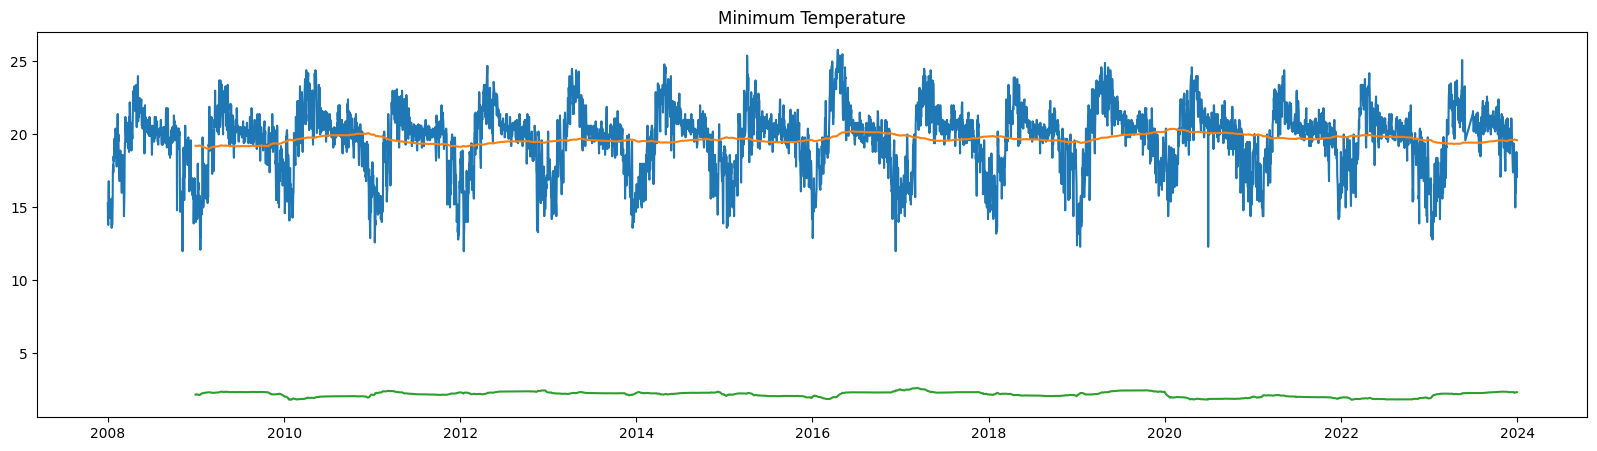

In [212]:
plt.figure(figsize=(20, 5))
plt.plot(data.Tm)
plt.plot(rolling_mean_min, label="rolling mean")
plt.plot(rolling_std_min, label="rolling std")
plt.title("Minimum Temperature")
plt.show()

**Conclusion:**

- Minimum temperature seems stationary in terms of mean as well as std

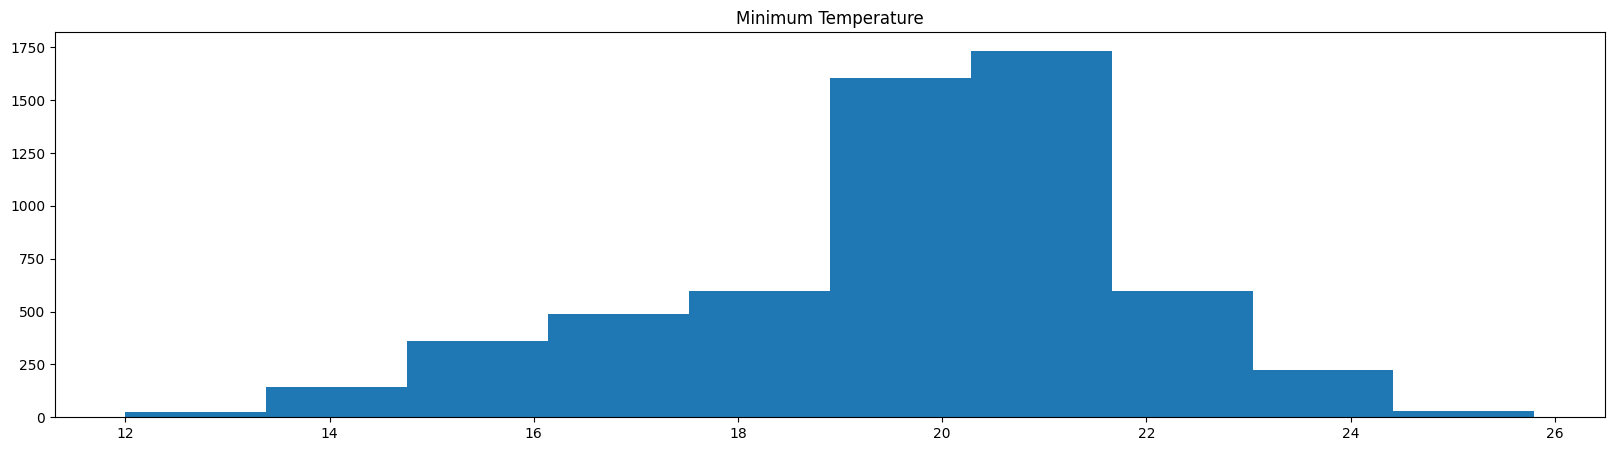

In [213]:
plt.figure(figsize=(20, 5))
plt.hist(data.Tm)
plt.title("Minimum Temperature")
plt.show()

### Average Temperature

In [214]:
# rolling mean
rolling_mean_avg = data['T'].rolling(365).mean()
rolling_std_avg = data['T'].rolling(200).std()

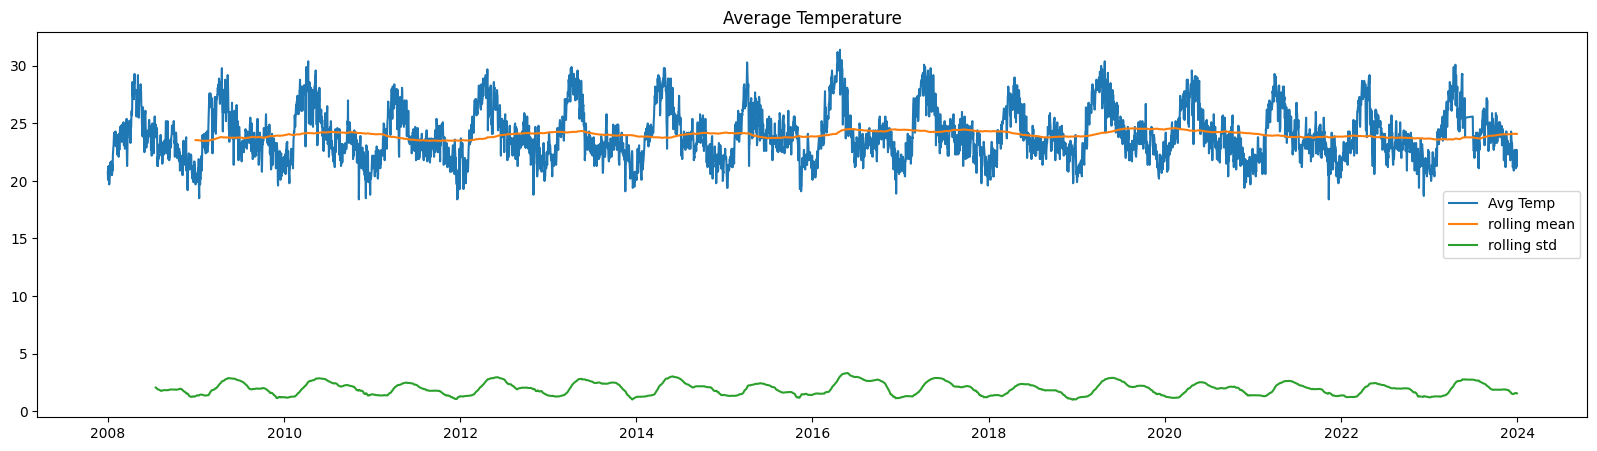

In [215]:
plt.figure(figsize=(20, 5))
plt.plot(data['T'], label="Avg Temp")
plt.plot(rolling_mean_avg, label="rolling mean")
plt.plot(rolling_std_avg, label="rolling std")
plt.title("Average Temperature")
plt.legend()
plt.show()

**Conclusion:**

- Average temperature seems stationary in terms of mean as well as std

### Maximum Temperature

In [216]:
# rolling mean
rolling_mean_max = data['TM'].rolling(365).mean()
rolling_std_max = data['TM'].rolling(365).std()

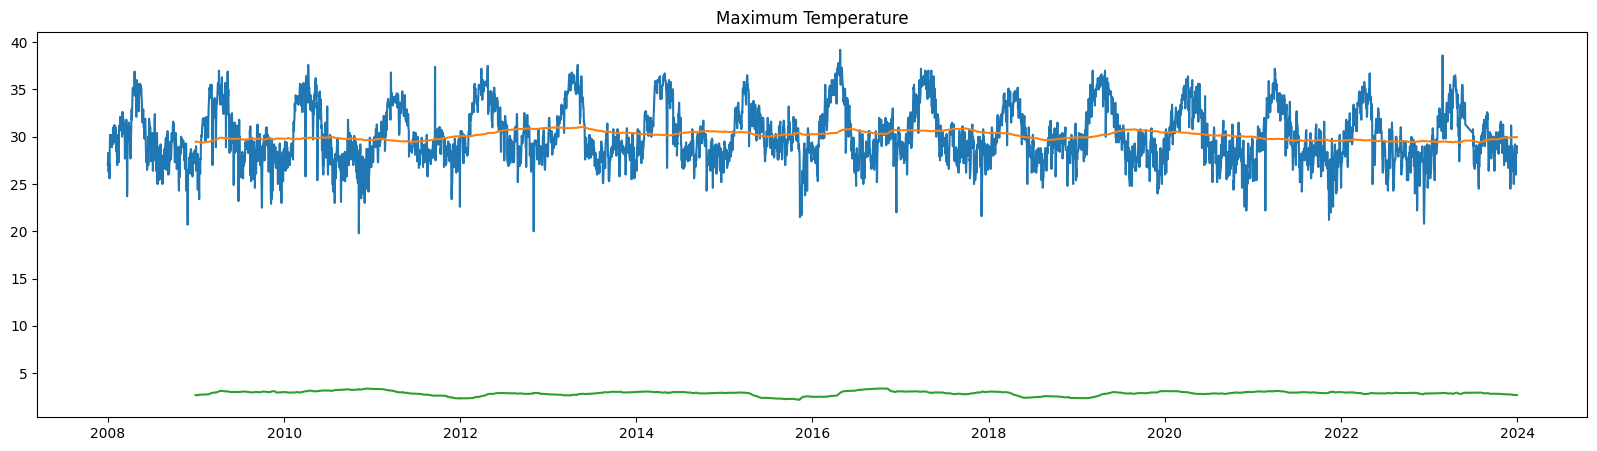

In [217]:
plt.figure(figsize=(20, 5))
plt.plot(data.TM)
plt.plot(rolling_mean_max, label='rolling mean')
plt.plot(rolling_std_max, label="rolling std")
plt.title("Maximum Temperature")
plt.show()

**Conclusion:**

- Maximum temperature seems stationary in terms of mean as well as std

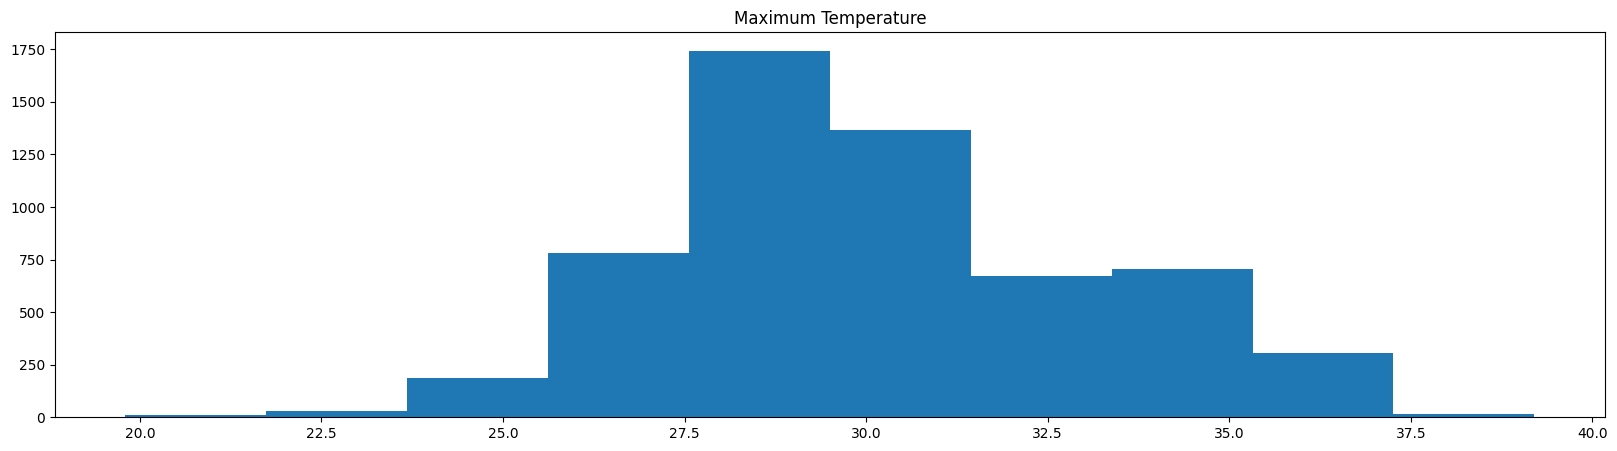

In [218]:
plt.figure(figsize=(20, 5))
plt.hist(data.TM)
plt.title("Maximum Temperature")
plt.show()

### Hypothesis testing to validate the claims

In [219]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(data:pd.DataFrame, col:str)-> dict:
    """ 
    hypothesis test for normality check in continuous variable
    """
    stat, p_value, _, _, _, _ = adfuller(data[col])
    h_0 = "H0: data is not stationary"
    h_1 = "H1: data is stationary"
    result = ""
    if p_value < 0.05:
        result = "Reject null hypothesis"
    else:
        result = "Fail to reject null hypothesis"

    return {"h0":h_0, "h1":h_1,"p_val":p_value, "cc":result}

**H0**: Data is not stationary

**H1**: Data is stationary

In [220]:
is_stationary(data, "T")

{'h0': 'H0: data is not stationary',
 'h1': 'H1: data is stationary',
 'p_val': 1.149431197406423e-08,
 'cc': 'Reject null hypothesis'}

In [221]:
is_stationary(data, "TM")

{'h0': 'H0: data is not stationary',
 'h1': 'H1: data is stationary',
 'p_val': 6.030723809784254e-08,
 'cc': 'Reject null hypothesis'}

In [222]:
is_stationary(data, "Tm")

{'h0': 'H0: data is not stationary',
 'h1': 'H1: data is stationary',
 'p_val': 5.087562842039189e-09,
 'cc': 'Reject null hypothesis'}

**Conclusion:**

- Average, Maximum and Minimum temperatures are stationary in terms of mean as well as std